In [5]:
from rnpe.tasks import SIRSDE, Cancer
from jax import random
import numpy as np
import pandas as pd

## SIR

In [ ]:
theta_key, x_key = random.split(random.PRNGKey(0))
task = SIRSDE(julia_env_path="..")
theta_true = task.sample_prior(theta_key, 1)
obs_original = task.simulate(x_key, theta_true, summarise=False)
obs_misspecified = task.misspecify(obs_original)

In [54]:
d = {"Original Simulation": obs_original, "Misspecified Observation": obs_misspecified}

df = pd.concat([
    pd.DataFrame(
        {
            "Source": k,
            "Infections": np.squeeze(v),
            "Days": np.arange(365)
        }
    ) for k,v in d.items()
])


/home/dw16200/miniconda3/envs/rnpe_env/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 5.5 x 2 in image.
/home/dw16200/miniconda3/envs/rnpe_env/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ../results/plots/misspecification_sir.pdf
/home/dw16200/miniconda3/envs/rnpe_env/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/dw16200/miniconda3/envs/rnpe_env/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


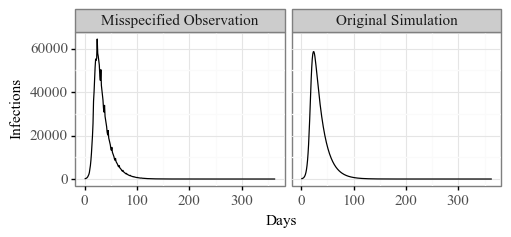

<ggplot: (8790760053080)>

In [56]:
from plotnine import ggplot, aes, geom_line, theme_bw, facet_wrap, element_text, theme

txt = element_text(family="Times New Roman", size=11)
thm = theme(
        #strip_text_x = element_text(
        #    margin={'t': 15, 'b': 10}),
        text=txt, title=txt, axis_title=txt, strip_text=txt,
        figure_size=(5.5, 2),
        legend_title=element_blank(),
        )

p = (
    ggplot(df, aes(x="Days", y="Infections")) +
    geom_line() +
    facet_wrap("~Source") +
    theme_bw() +
    thm
)
p.save("../results/plots/misspecification_sir.pdf")
p



## Cancer

In [16]:
from rnpe.tasks import Cancer

theta_key, x_key = random.split(random.PRNGKey(1))

task = Cancer()
theta = task.sample_prior(theta_key, 1)
x = task.simulate(theta_key, theta, summarise=False)
y = task.simulate(theta_key, theta, summarise=False, necrosis=True)


In [58]:

d = {"Original Simulation": x, "Misspecified Observation": y}
df = pd.concat([
    pd.DataFrame(
        {
            "Source": k,
            "x0": np.squeeze(v[0][0][:, 0]),
            "x1": np.squeeze(v[0][0][:, 1]),
            "Cancer": v[0][1],
        }
    ) for k,v in d.items()
])
df["Cancer"] = df["Cancer"].map({False: "Stromal cell", True: "Cancer cell"})

/home/dw16200/miniconda3/envs/rnpe_env/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 5.5 x 2 in image.
/home/dw16200/miniconda3/envs/rnpe_env/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ../results/plots/misspecification_cancer.pdf
/home/dw16200/miniconda3/envs/rnpe_env/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/dw16200/miniconda3/envs/rnpe_env/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


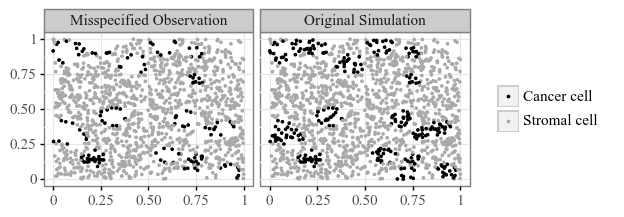

<ggplot: (8790760071605)>

In [59]:
from plotnine import ggplot, aes, geom_point, theme_bw, facet_wrap, scale_color_manual, xlab, ylab, element_blank

p = (
    ggplot(df, aes(x="x0", y="x1", colour="Cancer")) +
    geom_point(size=0.5) +
    facet_wrap("~Source") +
    theme_bw() +
    scale_color_manual(values=["black", "darkgrey"]) +
    xlab("") +
    ylab("") +
    thm
)
p.save("../results/plots/misspecification_cancer.pdf")
p

In [ ]:
# void process

# void process vs thomas misspecification. Just focussing on cancer cells.
# Single locus model as misspecified model. Model with linkage for real data.
# selection, dominance and popsize
# modelling both selection and recombination together is challenging.

# two locus model and two single locus model: small recombination, high correlation
# true model epistasis and linkage,

# Wright-Fisher two locus